# In this file I am trying to test model file by writing a code only using Numpy. No Keras API has used here. Main part will start by extracting the weight from model file. For loading model.h5 file Keras has used. Preprocessing also has done using some other library.

# This file will work for multi convolution filter
# Still some issue with convolution bias value

# Preprocessing the image

In [2]:
import numpy as np
from skimage import io, color, exposure, transform
from skimage.color import rgb2gray
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split  #it came from update scikit learn. https://stackoverflow.com/questions/40704484/importerror-no-module-named-model-selection
import os
import glob
import h5py

from matplotlib import pyplot as plt
%matplotlib inline

#import keras

NUM_CLASSES = 9
IMG_SIZE = 48

In [25]:
from keras.models import load_model
model = load_model('/home/atif/image_classification_c++/multi_filter_cpp/traffic_2_filter_no_pad_gray_ep_100_for_cpp.h5') # path of saved trained model file


def preprocess_img(img):
#     Histogram normalization in y
#     hsv = color.rgb2hsv(img)
#     hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
#     img = color.hsv2rgb(hsv)

    # central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]
    img = rgb2gray(img)

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

import glob

path = r'/home/atif/image_classification_c++/multi_filter_cpp/test_image/'

img_path = glob.glob(path+ '/*.ppm')  #change ppm to your desired file extension
for image in img_path:
    X_test=[]
    X_test.append(preprocess_img(io.imread(image)))
    X_test = np.array(X_test)
#     plt.imshow(X_test)
    X_test = X_test.reshape(len(X_test),1,IMG_SIZE,IMG_SIZE)
    
    print("\n",image)
    predicted_class = model.predict_classes(X_test)
    print("predicted class: ",predicted_class)
    
    probability = model.predict_proba(X_test)
    print("probability: ",probability)


 /home/atif/image_classification_c++/multi_filter_cpp/test_image/00000_00023.ppm
predicted class:  [0]
probability:  [[9.9994326e-01 5.4284519e-05 9.5645614e-15 5.9856886e-16 5.2972382e-07
  1.9570712e-06 5.6076757e-16 1.8678934e-12 7.6335409e-14]]

 /home/atif/image_classification_c++/multi_filter_cpp/test_image/stop.ppm
predicted class:  [1]
probability:  [[5.5017167e-13 9.9084878e-01 1.1804733e-17 5.7442348e-13 2.8099361e-14
  7.2337315e-17 9.1510238e-03 1.8840598e-07 2.2821717e-21]]


# Extracting weight information from  model.h5 file.

In [15]:
import pandas as pd
model = load_model('/home/atif/image_classification_c++/multi_filter_cpp/traffic_2_filter_no_pad_gray_ep_100_for_cpp.h5')

layer_list =[]
f = open('/home/atif/path_for_storing_all_layer_info.txt', 'w') #uncomment it if you want to store all layer info at a time.
for layer in model.layers:
    g=layer.get_config()
    h=layer.get_weights()
    
    layer_list.append(h)
#     print ("g== ",g,"\n") #for printing layer name and verbal info

#     print ("h== ",h,"\n\n") # for printing layer numeric value, eg: weight, bias value
#     print("type_of g == ",type(g),"\n")
#     print("type_of h == ",type(h),"\n")

# below lines till f.close() used for writing in text file. To do this you have to uncomment the above line started with f.open() also.

#     g1=str(g) # declaring a string variable g1 to store the info of g
#     h1=str(h) #declaring a string variable h1 to store the info of h
#     g_type=str(type(g)) #declaring a string variable g1 to store the type of g
#     h_type=str(type(h)) #declaring a string variable h1 to store the type of h
    
#     f.write("layer_definition: "+g1+"\n\n")
#     f.write("layer_type: "+g_type+"\n\n")
#     #f.write("\n")
#     f.write("layer_weight: "+h1+"\n\n")
#     f.write("weight_type: "+h_type+"\n\n\n")
#     f.write("\n")
    
# f.close()

# layer_name=['conv_layer','flatten_layer','dense_layer']



#From here the code has started which will extract every layer's info which you can use further in this file
        
conv_kernel=layer_list[0][0]
conv_kernel=conv_kernel.transpose()
print("conv_kernel: \n",conv_kernel,"\n\n")
print("conv_kernel shape:\t",conv_kernel.shape,"\n\n")
print("conv kernel dimension:\t",conv_kernel.ndim,"\n\n")
print("type_conv_kernel:",type(conv_kernel),"\n")

#conv_kernel_reshape=conv_kernel.reshape(conv_kernel[3],conv_kernel[2],conv_kernel[1],conv_kernel[0])
#print("re:  ",conv_kernel_reshape.shape)



conv_bias=layer_list[0][1]
print("conv_bias_value: ",conv_bias)
print("conv_bias ndim: ",conv_bias.ndim,"\n\n")



dense_kernel=layer_list[2][0]
print("dense_kernel: \n",dense_kernel,"\n\n")
print("dense_kernel shape:\t",dense_kernel.shape,"\n\n")
print("dense_kernel dimension:\t",dense_kernel.ndim,"\n\n")
print("type_dense_kernel:",type(dense_kernel),"\n")
print("dense_kernel size: ",dense_kernel.size,"\n")
# dense_1_transpose=dense__1.transpose()
# print("dense_1_transpose: ",dense_1_transpose,"\n\n")


dense_bias=layer_list[2][1]
print("dense_bias: ",dense_bias)
print("dense_bias_shape: ",dense_bias.shape)
dense_bias=dense_bias.reshape(1,9) # here chenge 5 to the number of your used class
print("dense_bias_shape: ",dense_bias.shape)
# print(dense_2[0])


# Below code stand for writing all info regarding specific layer in a text file. Not important. Uncomment if you need.

# write_conv_kernel=str(conv_kernel)
# write_conv_bias=str(conv_bias)
# write_dense_kernel=str(dense_kernel)
# write_dense_bias=str(dense_bias)


# f = open('/home/atif/training_by_several_learning_process/flower_photos/train_model_flower/flw_gray_ch_1_ep_100_no_pad_relu_31_dec_dense_kernel.txt', 'w')

# # f.write("write_conv_kernel:\n\n"+write_conv_kernel+"\n\n")

# # f.write("write_conv_bias:\n\n"+write_conv_bias+"\n\n")

# # f.write("write_dense_kernel:\n\n"+write_dense_kernel+"\n\n")

# # f.write("write_dense_bias:\n\n"+write_dense_bias+"\n\n")



# f.close()

conv_kernel: 
 [[[[-1.2551264   1.3612176   2.726472  ]
   [-0.81150454  1.0559597   2.4288604 ]
   [-2.2760212  -0.57018733 -0.53823084]]]


 [[[ 1.0510021   0.07008973 -1.1867875 ]
   [-0.6361769  -1.4376642  -1.6697451 ]
   [-0.12333418 -0.72826564 -0.9773183 ]]]] 


conv_kernel shape:	 (2, 1, 3, 3) 


conv kernel dimension:	 4 


type_conv_kernel: <class 'numpy.ndarray'> 

conv_bias_value:  [0.01443624 1.3674825 ]
conv_bias ndim:  1 


dense_kernel: 
 [[-0.10735643  0.1640812   0.01809431 ... -0.00946912  0.02848358
   0.030178  ]
 [ 0.01419004  0.04051202 -0.01726801 ...  0.03679919 -0.01469056
   0.00603583]
 [-0.16923815  0.00935     0.05318739 ... -0.03917252  0.00961874
   0.03357002]
 ...
 [-0.00470943 -0.01924564 -0.03366284 ...  0.00219134 -0.02493748
  -0.02235573]
 [-0.00165659  0.15928343 -0.03851683 ...  0.01218016 -0.01192294
  -0.0396612 ]
 [-0.02387131  0.01669946 -0.0110182  ... -0.04726045 -0.02935163
  -0.02188727]] 


dense_kernel shape:	 (4232, 9) 


dense_kerne

# Storing convolution kernel weight in a text file which you can use for C++ purpose

In [18]:
# storing convolution kernel weight

conv_kernel=layer_list[0][0]
conv_kernel=conv_kernel.transpose() # This has made to print it like a Matrix form. 
i_list=[]
for i in conv_kernel:
#     print(i)
    i_list.append(i)
#     for k in i:
#         print(k)
#         i_list.append(k)
# print(i_list)
i_list_array=[]
i_list_array=np.array(i_list)
# print(i_list_array.shape)
# i_list_array=i_list_array.reshape(2,3,3)
# print(i_list_array.ndim)

for p in i_list_array:
#     for a in p:
#         print(a)
    print(p)
    ww=str(p)
    ww=ww.replace('[','')
    ww=ww.replace(']','')
    f=open('/home/atif/conv_k_w.txt','a')
    f.write(ww)
    f.write("\n")
f.close()

[[[-1.2551264   1.3612176   2.726472  ]
  [-0.81150454  1.0559597   2.4288604 ]
  [-2.2760212  -0.57018733 -0.53823084]]]
[[[ 1.0510021   0.07008973 -1.1867875 ]
  [-0.6361769  -1.4376642  -1.6697451 ]
  [-0.12333418 -0.72826564 -0.9773183 ]]]


# Storing dense kernel weight directly from the array in a text file

In [19]:
dense_kernel=layer_list[2][0]
i_list=[] #declare a list to store the weight of dense kernel
for i in dense_kernel:
#     print(i)
    i_list.append(i) #appended it in the declared list
#     for k in i:
# #         print(k)
#         i_list.append(k)
# print(i_list)
i_list_array=[] #declared an array
i_list_array=np.array(i_list) # store the value of list in the array
print(i_list_array)
np.savetxt('/home/atif/dense_k_w.txt', i_list_array, fmt='%1.8e',delimiter=' ') #writing on a text file from array
# %.8f
# fmt='%1.8e' #add this above line after i_list_aray

[[-0.10735643  0.1640812   0.01809431 ... -0.00946912  0.02848358
   0.030178  ]
 [ 0.01419004  0.04051202 -0.01726801 ...  0.03679919 -0.01469056
   0.00603583]
 [-0.16923815  0.00935     0.05318739 ... -0.03917252  0.00961874
   0.03357002]
 ...
 [-0.00470943 -0.01924564 -0.03366284 ...  0.00219134 -0.02493748
  -0.02235573]
 [-0.00165659  0.15928343 -0.03851683 ...  0.01218016 -0.01192294
  -0.0396612 ]
 [-0.02387131  0.01669946 -0.0110182  ... -0.04726045 -0.02935163
  -0.02188727]]


# Storing info of convolution bias in text file

In [20]:
# storing conv_bias

conv_bias=layer_list[0][1]
conv_bias_list=[]
for i in conv_bias:
    conv_bias_list.append(i)

conv_bias_array=[]
conv_bias_array=np.array(conv_bias_list)
print(conv_bias_array)
np.savetxt('/home/atif/conv_k_b.txt', conv_bias_array, fmt='%1.8e',delimiter=' ')

[0.01443624 1.3674825 ]


# Storing info of dense bias in text file

In [21]:
#storing dense_bias value

dense_bias=layer_list[2][1]
dense_bias_list=[]
for i in dense_bias:
    dense_bias_list.append(i)

dense_bias_array=[]
dense_bias_array=np.array(dense_bias_list)
print(dense_bias_array)
np.savetxt('/home/atif/dense_bb.txt', dense_bias_array, fmt='%1.8e',delimiter=' ')

[-0.01253249  0.19295532  0.06694246  0.18706687 -0.24281958  0.13072969
 -0.02468821 -0.22385639 -0.07379571]


## Below at first, I am making conv_kernel suitable for the approach. Like reshaping and storing in an suitable array to get dim = 3

In [23]:
print("conv_kernel:\n",conv_kernel,"\n")
print("conv_kernel_shape:",conv_kernel.shape,"\tconv_kernel ndim:",conv_kernel.ndim,"\n")
print("length of conv_kernel:",len(conv_kernel),"\n")

conv_kernel_reshape=conv_kernel.reshape(2,3,3) # 2 for 2 filter. change it according to your filter number
print("conv_kernel_reshape:\n",conv_kernel_reshape,"\n")
print("conv_kernel_reshape shape:",conv_kernel_reshape.shape,"\tconv_kernel_reshape ndim:",conv_kernel_reshape.ndim,"\n")
print("length of conv_kernel_reshape:",len(conv_kernel_reshape[0]),"\n")

convolution_kernel_filter=[]
convolution_kernel_filter=np.zeros((2,3,3)) # 2 for 2 filter. change it according to your filter number
convolution_kernel_filter[:,:,:]=np.array(conv_kernel_reshape)
print("convolution_kernel_filter: \n",convolution_kernel_filter,"\n")
print("convolution_kernel_filter shape:",convolution_kernel_filter.shape,"\tconvolution_kernel_filter ndim:",convolution_kernel_filter.ndim,"\n")
print("length of convolution_kernel_filter:",len(convolution_kernel_filter),"\n")

conv_kernel:
 [[[[-1.2551264   1.3612176   2.726472  ]
   [-0.81150454  1.0559597   2.4288604 ]
   [-2.2760212  -0.57018733 -0.53823084]]]


 [[[ 1.0510021   0.07008973 -1.1867875 ]
   [-0.6361769  -1.4376642  -1.6697451 ]
   [-0.12333418 -0.72826564 -0.9773183 ]]]] 

conv_kernel_shape: (2, 1, 3, 3) 	conv_kernel ndim: 4 

length of conv_kernel: 2 

conv_kernel_reshape:
 [[[-1.2551264   1.3612176   2.726472  ]
  [-0.81150454  1.0559597   2.4288604 ]
  [-2.2760212  -0.57018733 -0.53823084]]

 [[ 1.0510021   0.07008973 -1.1867875 ]
  [-0.6361769  -1.4376642  -1.6697451 ]
  [-0.12333418 -0.72826564 -0.9773183 ]]] 

conv_kernel_reshape shape: (2, 3, 3) 	conv_kernel_reshape ndim: 3 

length of conv_kernel_reshape: 3 

convolution_kernel_filter: 
 [[[-1.25512636  1.36121762  2.7264719 ]
  [-0.81150454  1.0559597   2.42886043]
  [-2.27602124 -0.57018733 -0.53823084]]

 [[ 1.05100214  0.07008973 -1.18678749]
  [-0.63617688 -1.43766415 -1.66974509]
  [-0.12333418 -0.72826564 -0.97731829]]] 

con

## Here I am reshapingbmy test image for thsi approach.

X_test_conv shape:  (48, 48) 

length of X_test_conv:  2 

X_test_conv size:  2304 

X_test_conv ndim:  [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] 



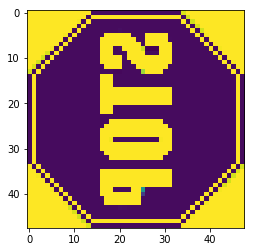

In [27]:
X_test_conv = X_test.reshape(IMG_SIZE,IMG_SIZE)
print("X_test_conv shape: ",X_test_conv.shape,"\n")
print("length of X_test_conv: ",len(X_test_conv.shape),"\n")
print("X_test_conv size: ",X_test_conv.size,"\n")
print("X_test_conv ndim: ",X_test_conv,"\n")
plt.imshow(X_test_conv)

## In following cell I have added Padding to the input. For my further work to keep simplicity I have not used this but it will work.

In [ ]:
# X_test_conv_padded=np.pad(X_test_conv, ((1,1),(1,1)), 'constant')
# print("X_test_conv_padded size: ",X_test_conv_padded.size,"\n")
# plt.imshow(X_test_conv_padded)

## Function for convolution with the convolution filter and then use the created feature map

In [28]:
import numpy
import sys


conv_bias=conv_bias
print(conv_bias)

def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    print("filter_size: ",filter_size)
    print("img shape: ",img.shape)
    result = numpy.zeros((img.shape))
    print("result: ",result)
    #Looping through the image to apply the convolution operation.
    for r in numpy.uint16(numpy.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        
        for c in numpy.uint16(numpy.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), 
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
        
            #Element-wise multipliplication between the current region and the filter.
            print("img: ",img)
            curr_result = curr_region * conv_filter
            print("curr_result: ",curr_result)
            curr_result= curr_result+conv_bias
#             print(conv_bias)
#             print(curr_result)
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
    #print(curr_region)
    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result
def conv(img, conv_filter):
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        print("len: ",len(curr_filter.shape))
        if len(curr_filter.shape) > 2:
            print("CONV function has worked")
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            print("CONV function has worked_lala")
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.


def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = numpy.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in numpy.arange(0,feature_map.shape[0]):
            for c in numpy.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = numpy.max([feature_map[r, c, map_num], 0])
    return relu_out

def softmax_fn(input_array):
    e_x=np.exp(input_array-np.max(input_array))
    return e_x/e_x.sum(axis=len(e_x.shape)-1)


# X_test = X_test.reshape(1,IMG_SIZE,IMG_SIZE)

feature=conv(img=X_test_conv,conv_filter=convolution_kernel_filter)
soft_max=softmax_fn(feature)
relu_out=relu(feature)
# # print(img.shape)
# print(feature[:,:,0])
# print("\n\n",feature[:,:,1])

[0.01443624 1.3674825 ]
Filter  1
len:  2
CONV function has worked_lala
filter_size:  3
img shape:  (48, 48)
result:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
img:  [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
curr_result:  [[-1.25512636  1.36121762  2.7264719 ]
 [-0.81150454  1.0559597   2.42886043]
 [-2.27602124 -0.57018733 -0.53823084]]


ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

## following cell is showing the output of 'conv' function.

(46, 46, 2)
transpose_feature_map shape:  (2, 46, 46)
transpose_feature_map: 
 [[[12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  ...
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]]

 [[ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  ...
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.1618

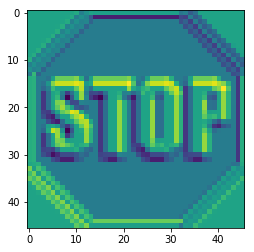

In [30]:
print(feature.shape)

# x_feature_map=np.flipud(feature[0])
transpose_feature_map=feature.transpose()
print("transpose_feature_map shape: ",transpose_feature_map.shape)
plt.imshow(transpose_feature_map[0])
print("transpose_feature_map: \n",transpose_feature_map)

## following cell works with relu. if you want to apply relu on feature map then execute it. for this you have to also change in the called model in the training phase and train again.

relu_out shape:  (46, 46, 2)
relu_out_transpose shape:  (2, 46, 46)
relu_out_transpose:
 [[[12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  ...
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]
  [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
   12.92143934]]

 [[ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  ...
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015
    5.16180015]
  [ 5.16180015  5.16180015  5.16180015 ...  5.16180015  5.16180015


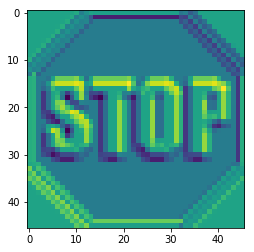

In [31]:
print("relu_out shape: ",relu_out.shape)
relu_out_transpose=relu_out.transpose()
print("relu_out_transpose shape: ",relu_out_transpose.shape)
plt.imshow(relu_out_transpose[0])
print("relu_out_transpose:\n",relu_out_transpose)

## In the following cell I have done matrix_multiplication between relu output and dense_kernel. Finally added dense_bias value.

In [32]:
flatten_relu_out_transpose=relu_out_transpose.reshape(1,2*46*46)  #if you don't do padd on input image please make it 46*46. how 46 came? 
                                                                                    #the formula of output size.
print("flatten_relu_out_transpose shape: ",flatten_relu_out_transpose.shape)

print("dense_kernel shape: ",dense_kernel.shape,"\n")

matmul_flatt_rel_dense_kernel=np.matmul(flatten_relu_out_transpose,dense_kernel)
print("matmul_soft_dense_kernel shape",matmul_flatt_rel_dense_kernel.shape,"\n")
print("matmul_soft_dense_kernel: ",matmul_flatt_rel_dense_kernel,"\n")

dense_bias_array=np.array(dense_bias)
dense_bias_array=dense_bias_array.reshape(1,9)
print("dense_bias_array: ",dense_bias_array,"\n")

add_matmul_flatt_rel_dense_kernel_and_dense_bias_array=matmul_flatt_rel_dense_kernel+dense_bias_array
print("value add_matmul_flatt_rel_dense_kernel_and_dense2_array:\n",add_matmul_flatt_rel_dense_kernel_and_dense_bias_array)

flatten_relu_out_transpose shape:  (1, 4232)
dense_kernel shape:  (4232, 9) 

matmul_soft_dense_kernel shape (1, 9) 

matmul_soft_dense_kernel:  [[-185.0576935   -25.80008745   29.31363173   99.0706058    47.40671623
    15.71534522  -20.6711238   -17.72083701  -15.07523071]] 

dense_bias_array:  [[-0.01253249  0.19295532  0.06694246  0.18706687 -0.24281958  0.13072969
  -0.02468821 -0.22385639 -0.07379571]] 

value add_matmul_flatt_rel_dense_kernel_and_dense2_array:
 [[-185.07022599  -25.60713214   29.38057419   99.25767267   47.16389665
    15.84607491  -20.695812    -17.9446934   -15.14902641]]


## Here, I have applied softmax to the output and then calculated the class

In [33]:
def softmax_fn(input_array):
    e_x=np.exp(input_array-np.max(input_array))
    return e_x/e_x.sum(axis=len(e_x.shape)-1)

op= softmax_fn(add_matmul_flatt_rel_dense_kernel_and_dense_bias_array)
print("output of FC layer: ",op,"\n")
########################
# Folowing code for finding class##
########################
m=0
k=0
# op=[[0.17095664, 0.24349895, 0.172376,   0.19243606, 0.62073235]]
# op=np.array(op)
# print(op.shape)
# print(type(op))

for h in op:
    
    for index,j in enumerate(h):
    
        o=j
        #print(o)
        if o>m:
            m=o
            print(m)
            k=index
        else:
            pass
print('class:',k)
        

output of FC layer:  [[3.29581298e-124 5.91431279e-055 4.49533146e-031 1.00000000e+000
  2.37662430e-023 5.95392508e-037 8.03273652e-053 1.25793775e-051
  2.05969017e-050]] 

3.295812978283471e-124
5.9143127862059375e-55
4.495331455858062e-31
1.0
class: 3


# Use it for multi filter

In [29]:
import numpy
import sys
# conv_bias=conv_bias
# conv_bias_new=1.3
# print(conv_bias_new)

def conv_(img, conv_filter):
    print("\nconv_ function start to work\n")
    filter_size = conv_filter.shape[1] #output is 3
    print("filter_size: ",filter_size)
    print("img shape: ",img.shape)
    result = numpy.zeros((img.shape))
#     result= result.reshape(1,result)
#     print("result: ",result)
    #Looping through the image to apply the convolution operation.
#     for x,i in enumerate(conv_bias):
        
    for r in numpy.uint16(numpy.arange(filter_size/2.0,img.shape[0]-filter_size/2.0+1)):
        
        for c in numpy.uint16(numpy.arange(filter_size/2.0,img.shape[1]-filter_size/2.0+1)):
            
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
        
            #Element-wise multipliplication between the current region and the filter.
            
            curr_result = curr_region * conv_filter
#             print("curr_result: ",curr_result)
            curr_result= curr_result+1.2
#             print("conv_bias: ",conv_bias_new)
#             print("new curr res: ",curr_result)
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum#Saving the summation in the convolution layer feature map.
#             print("conv_sum_shape: ",conv_sum.shape)
    #print(curr_region)
    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0),numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    print("\nconv_ function finish\n")
    return final_result



def conv(img, conv_filter):
#     print("conv_filter:: ", conv_filter.shape[0])
    
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, img.shape[1]-conv_filter.shape[1]+1, conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    
    for filter_num in range(conv_filter.shape[0]):
#         print("filter num: ",filter_num)
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
#         print(curr_filter)
        print("curr_fiter_shape: ",curr_filter.shape)
#         print("length of curr_fiter_shape: ",len(curr_filter.shape))


        if len(curr_filter.shape) > 2:
            print("CONV function has worked")
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            print("go to conv_ function ")
            conv_map = conv_(img, curr_filter)
            print(conv_map)
            
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
#         print("feature_maps from conv_map: ",feature_maps)
    return feature_maps # Returning all feature maps.


def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = numpy.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in numpy.arange(0,feature_map.shape[0]):
            for c in numpy.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = numpy.max([feature_map[r, c, map_num], 0])
    return relu_out

def softmax_fn(input_array):
    e_x=np.exp(input_array-np.max(input_array))
    return e_x/e_x.sum(axis=len(e_x.shape)-1)


# X_test = X_test.reshape(1,IMG_SIZE,IMG_SIZE)

feature=conv(img=X_test_conv,conv_filter=convolution_kernel_filter)
relu_out=relu(feature)
# soft_max=softmax_fn(feature)

Filter  1
curr_fiter_shape:  (3, 3)
go to conv_ function 

conv_ function start to work

filter_size:  3
img shape:  (48, 48)

conv_ function finish

[[12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
  12.92143934]
 [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
  12.92143934]
 [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
  12.92143934]
 ...
 [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
  12.92143934]
 [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
  12.92143934]
 [12.92143934 12.92143934 12.92143934 ... 12.92143934 12.92143934
  12.92143934]]
Filter  2
curr_fiter_shape:  (3, 3)
go to conv_ function 

conv_ function start to work

filter_size:  3
img shape:  (48, 48)

conv_ function finish

[[5.16180015 5.16180015 5.16180015 ... 5.16180015 5.16180015 5.16180015]
 [5.16180015 5.16180015 5.16180015 ... 5.16180015 5.16180015 5.16180015]
 [5.16180015 5.16180015 5.16180015 ... 5.16180015 5.16180015 5